# 분석의 목표 : 21년 3분기 신규게임 설계방향 계획
> 가정 : 게임플랫폼을 제작하지 않는 퍼블리셔




# 데이터 전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
file_path = '/content/drive/MyDrive/AIbootcamp_sample/sec1_project.csv'
df = pd.read_csv(file_path, encoding = 'utf-8').drop('Unnamed: 0', axis=1)

# 판매량의 데이터 타입을 object에서 numeric(int)으로 변환
# 기본단위를 million으로 보고 읽기 편하도록 백만단위(M)로 기준 통일
def value_to_float(x):
    if 'K' in x:
        return float(x.replace('K', '')) *0.001
    elif 'M' in x:
        return float(x.replace('M', '')) 
    else : 
        return float(x)
df['NA_Sales'] = df['NA_Sales'].apply(value_to_float)
df['EU_Sales'] = df['EU_Sales'].apply(value_to_float)
df['JP_Sales'] = df['JP_Sales'].apply(value_to_float)
df['Other_Sales'] = df['Other_Sales'].apply(value_to_float)

# 결측치 확인 후 제거
df.isnull().sum()
df = df.dropna()

# 지역별 합계 컬럼 추가
df['Total_Sales']= df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

# Year열 데이터 전처리
df= df[df['Year'] > 1979.0] #1980년도 데이터부터 시작하므로 1979년이상인 것들만 추출
df = df.sort_values(by=['Year'],axis=0, ascending=True) #연도 내림차순으로 나열 # Total sales sum확인: 8694.35 

## (EDA) 지역별 비디오 게임 판매량

In [ ]:
regional_sales = [df.NA_Sales.sum(),df.EU_Sales.sum(),df.JP_Sales.sum(),df.Other_Sales.sum()]
regions = ['NA','EU','JP','Others']
explode = (0.02,0.02,0.02,0.02)

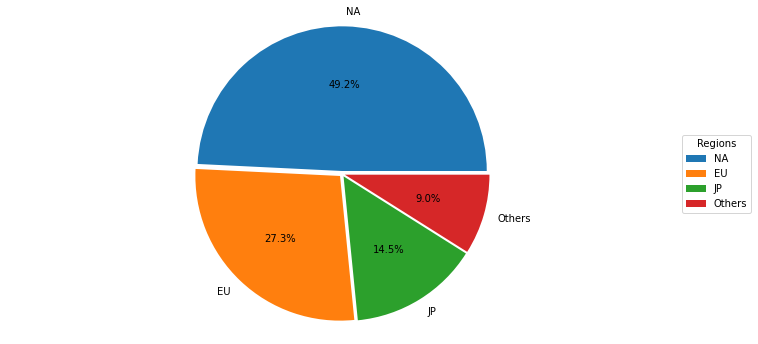

In [ ]:
plt.figure(figsize=(12,6))
plt.pie(regional_sales,explode = explode,labels=regions,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(regions,
          title="Regions",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

# 1. 지역에 따라서 선호하는 게임이 다를까?
## 지역마다 인기있는 게임이 다를까?
지역별 판매량 Top5 게임 비교 결과 -> 지역마다 인기있는 게임이 다름

In [ ]:
#지역별 판매량 최대값 top5 목록을 내림차순으로 추출 후 인덱스 reset
NA_sales_max = df.sort_values(by='NA_Sales',ascending=False).head(5).reset_index()
EU_sales_max = df.sort_values(by='EU_Sales',ascending=False).head(5).reset_index()
EU_sales_max = df.sort_values(by='JP_Sales',ascending=False).head(5).reset_index()

In [48]:
print(NA_sales_max[['Name','NA_Sales','EU_Sales','JP_Sales','Total_Sales']],'\n')
print(EU_sales_max[['Name','NA_Sales','EU_Sales','JP_Sales','Total_Sales']],'\n')
print(JP_sales_max[['Name','NA_Sales','EU_Sales','JP_Sales','Total_Sales']])

                Name  NA_Sales  EU_Sales  JP_Sales  Total_Sales
0         Wii Sports     41.49     29.02      3.77        82.74
1  Super Mario Bros.     29.08      3.58      6.81        40.24
2          Duck Hunt     26.93      0.63      0.28        28.31
3             Tetris     23.20      2.26      4.22        30.26
4     Mario Kart Wii     15.85     12.88      3.79        35.83 

                 Name  NA_Sales  EU_Sales  JP_Sales  Total_Sales
0          Wii Sports     41.49     29.02      3.77        82.74
1      Mario Kart Wii     15.85     12.88      3.79        35.83
2   Wii Sports Resort     15.75     11.01      3.28        33.00
3          Nintendogs      9.07     11.00      1.93        24.75
4  Grand Theft Auto V      7.01      9.27      0.97        21.39 

                            Name  NA_Sales  EU_Sales  JP_Sales  Total_Sales
0       Pokemon Red/Pokemon Blue     11.27      8.89     10.22        31.38
1    Pokemon Gold/Pokemon Silver      9.00      6.18      7.20        

## 지역마다 선호하는 게임의 장르가 다를까?
NA/EU/JP 구분해서 출고량 내림차순 sort, 장르 group by (others의 경우 지역이 섞여있어 제외)

In [ ]:
#북아메리카 판매량별 정렬
NA = df.sort_values(by=['NA_Sales'],axis=0,ascending=False).iloc[:,0:6]
NA = NA.reset_index().drop('index',axis=1)
NA = NA[NA['NA_Sales'] != 0.00]
#NA sales sum: 4392 
NA_group = pd.DataFrame(NA.groupby(['Genre'])['NA_Sales'].sum().sort_values(ascending=False))
# 장르별로 그룹핑 후 데이터프레임 생성
NA_group['Rank'] = [1,2,3,4,5,6,7,8,9,10,11,12]

In [ ]:
# 유럽 판매량별 정렬
EU = df.sort_values(by=['EU_Sales'],axis=0,ascending=False).iloc[:,0:7]
EU.drop('NA_Sales', axis=1, inplace=True)
EU = EU.reset_index().drop('index',axis=1)
EU = EU[EU['EU_Sales'] !=0.00]
#EU sales sum: 2434 
EU_group = pd.DataFrame(EU.groupby(['Genre'])['EU_Sales'].sum().sort_values(ascending=False))
EU_group
# 장르별로 그룹핑 후 데이터프레임 생성
EU_group['Rank'] = [1,2,3,4,5,6,7,8,9,10,11,12]

In [ ]:
#일본 판매량별 정렬
JP = df.sort_values(by=['JP_Sales'],axis=0,ascending=False).iloc[:,0:8]
JP.drop(['EU_Sales','NA_Sales'], axis=1, inplace=True)
JP = JP.reset_index().drop('index',axis=1)
JP = JP[JP['JP_Sales'] !=0.00]
#JP sales sum: 1291 
JP_group = pd.DataFrame(JP.groupby(['Genre'])['JP_Sales'].sum().sort_values(ascending=False))
JP_group
# 장르별로 그룹핑 후 데이터프레임 생성
JP_group['Rank'] = [1,2,3,4,5,6,7,8,9,10,11,12]

In [ ]:
sales_region = pd.concat([NA_group, EU_group, JP_group], axis =1)
sales_region

# Action, Sports의 경우 북미와 유럽에서 공동으로 1,2위, 일본에서도 2,3위를 차지하여 가장 인기있는 장르임
# 일본의 경우 다른 지역과 달리 Role-Playing 장르가 1위이며, 장르별 편차가 적음
# Shooter 장르는 북미와 유럽에서는 3위를 차지했으나, 일본에서는 가장 인기가 없음 

,NA_Sales,Rank,EU_Sales,Rank,JP_Sales,Rank
Action,855.96,1,512.52,1,155.73,2
Sports,664.33,2,369.69,2,134.58,3
Shooter,570.89,3,307.26,3,37.34,12
Platform,442.46,4,199.40,6,129.22,4
Misc,394.29,5,207.68,5,103.71,5
Racing,353.57,6,234.20,4,55.42,9
Role-Playing,307.08,7,176.31,7,336.25,1
Fighting,220.11,8,99.72,9,86.39,6
Simulation,181.04,9,112.68,8,63.46,7
Puzzle,121.00,10,50.39,11,56.19,8


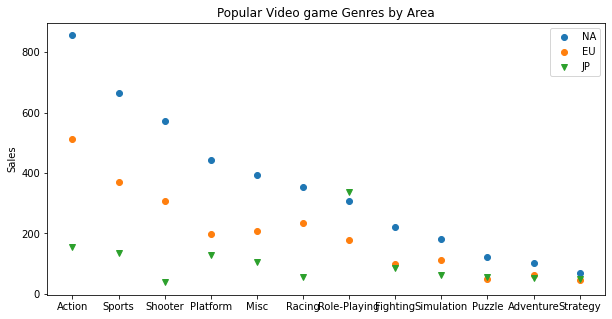

In [ ]:
# 지역별 장르별 판매량 시각화 -> 인기 장르는 지역별 차이 존재
plt.figure(figsize=(10,5))
plt.plot(NA_group.drop('Rank',axis=1), 'o')
plt.plot(EU_group.drop('Rank',axis=1), 'o')
plt.plot(JP_group.drop('Rank',axis=1), 'v')

plt.ylabel('Sales')
plt.title('Popular Video game Genres by Area')

plt.legend(['NA','EU','JP'])

# 2. 연도별 게임의 트렌드(플랫폼, 장르)가 있을까?
지역구분 없이 총 출고량 기준으로 연도별 내림차순 sort

## (EDA) 플랫폼 점유율(누적)

In [ ]:
# 각 플랫폼 갯수 확인 후(31개) 내림차순 정렬
platform_count = pd.DataFrame(df.groupby(['Platform'])['Name'].count().sort_values(ascending=False))

# 총 게임수 대비 각 플랫폼의 게임종류의 순위를 시각화하기 위해 비율 column 추가
platform_count['Percent']= round(platform_count['Name']/sum(platform_count['Name'])*100,2)
platform_count.rename(columns = {'Name':'Count'}, inplace=True)
platform_count.head(20) #20개의 플랫폼이 약 98%차지

# 플랫폼별 누적 게임수로 비교했을 때 DS(Nintendo), PS2(sony), PS3(sony), WII(NIntendo)의 게임출시가 많음

,Count,Percent
Platform,,
DS,2111,13.08
PS2,2109,13.07
PS3,1291,8.00
Wii,1279,7.92
X360,1226,7.60
PSP,1186,7.35
PS,1178,7.30
PC,929,5.76
XB,794,4.92


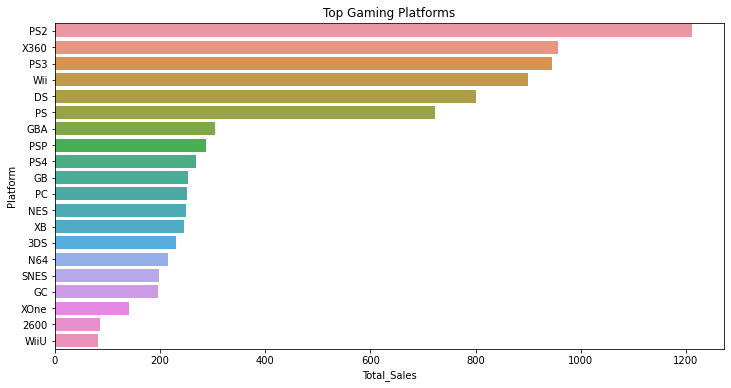

In [ ]:
# Top 20개 플랫폼 판매량으로 시각화 
top_sales_platform = pd.DataFrame(df.groupby(['Platform'])['Total_Sales'].sum())
top_sales_platform  = top_sales_platform.sort_values(by=['Total_Sales'],axis=0,ascending=False).reset_index().head(20)
top_sales_platform 

plt.figure(figsize=(12,6))
plt.title("Top Gaming Platforms")
sns.barplot(x='Total_Sales',y='Platform',data=top_sales_platform);
# 플랫폼별 게임판매량으로 비교했을 때 PS2, X360, PS3, Wii, DS순으로 누적판매량이 높음

## https://www.theguardian.com/games/2020/jul/16/the-25-greatest-video-game-consoles-ranked

## (1) 연도별 유행하는 플랫폼이 있을 것이다. >> 연도별 특정 플랫폼의 출시게임수 & 판매량이 많다

In [ ]:
# Platform과 연도별 발매게임수를 변수로 카이제곱 검정
corr = pd.crosstab(df['Platform'], df['Year'])

from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(corr)
print(f'p-value : {pval}')
# p-value = 0.0 귀무가설 기각 -> 플랫폼과 연도별 발매게임수는 상관관계가 있음

p-value : 0.0


In [ ]:
# 각 연도별 플랫폼별 판매량 합계
df_year_platform = pd.DataFrame(df.groupby(['Year','Platform'])['Total_Sales'].sum().unstack())
df_year_platform.replace(np.nan,"",inplace=True)

# 총 16241개 게임중 판매량이 0.1%(16)이하인 7개 플랫폼 제외한 결과
df_year_platform.drop(['NG','SCD','WS','3DO','TG16','PCFX','GG'], axis=1, inplace=True)
pd.set_option('display.max_columns', df.shape[0])
df_year_platform = df_year_platform.T
df_year_platform

# 연도별 유행하는 플랫폼이 다르며, 2000년대 중반부터 더 많은 플랫폼들이 경쟁하기 시작

Year,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2020.0
Platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2600,10.88,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3DS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,62.33,51.1,41.32,43.11,26.82,6.54,,
DC,,,,,,,,,,,,,,,,,,,3.38,5.16,5.99,1.07,0.29,,,,,0.02,0.04,,,,,,,,,,
DS,,,,,,0.02,,,,,,,,,,,,,,,,,,,17.41,130.61,120.92,148.62,146.85,121.73,72.52,27.52,11.55,1.96,0.02,,,,0.29
GB,,,,,,,,,1.43,64.97,4.89,5.57,25.49,,12.18,3.6,36.03,6.37,26.9,38,19.56,9.24,,,,,,,,,,,,,,,,,
GBA,,,,,,,,,,,,,,,,,,,,,0.07,61.35,74.11,56.64,72.62,32.36,5.2,2.19,,,,,,,,,,,
GC,,,,,,,,,,,,,,,,,,,,,,26.34,51.74,49.74,28.61,27.62,11.26,0.27,,,,,,,,,,,
GEN,,,,,,,,,,,2.6,4.33,12.64,0.65,8.13,,,,,,,,,,,,,,,,,,,,,,,,
N64,,,,,,,,,,,,,,,,,34.1,39.31,47.18,57.87,33.88,3.25,0.08,,,,,,,,,,,,,,,,


## (2) 플랫폼에 따라 게임의 장르가 다를까?
- 플랫폼에 따라 구현하기 쉬운 게임의 장르가 다를 것이다.

1) 귀무가설 : 두 변수간 연관이 없다.
2) 대립가설 : 두 변수간 연관이 있다.
3) 신뢰구간 : 95%
### 카이제곱 검정 실시

In [ ]:
correlation = pd.crosstab(df['Platform'], df['Genre'])

from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(correlation)
print(f'p-value : {pval}')

# p-value = 0.0 귀무가설 기각 -> 플랫폼과 게임장르(별 게임발매수)는 상관관계가 있음

p-value : 0.0


## (EDA) Top 20 Publishers with Most Games & Sales

In [ ]:
# 게임 출시 수 기준 상위 20개 Publisher
publisher = pd.DataFrame(df['Publisher'].value_counts(sort=True, ascending=False).head(20))
publisher = publisher.reset_index().rename(columns={'index' : 'Publisher','Publisher' : 'number'})

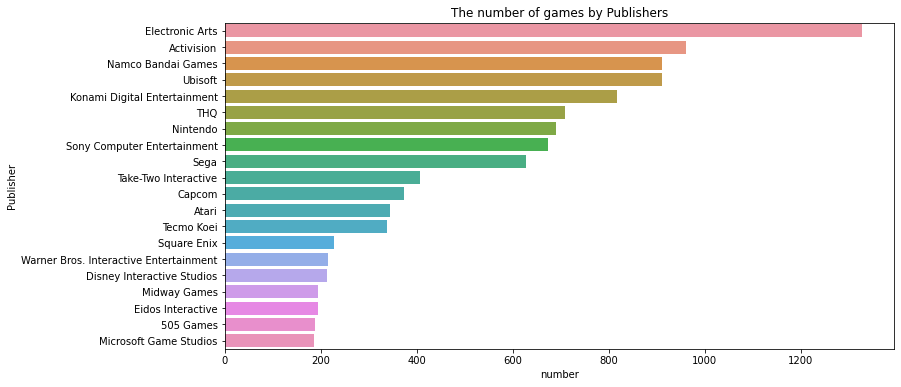

In [ ]:
plt.figure(figsize=(12,6))
plt.title("The number of games by Publishers")
sns.barplot(x='number',y='Publisher',data=publisher)

In [ ]:
# 판매량 기준 top20 publisher
top_sales_publisher = pd.DataFrame(df.groupby(['Publisher'])['Total_Sales'].sum())
top_sales_publisher = top_sales_publisher.sort_values(by=['Total_Sales'],axis=0,ascending=False).head(20).reset_index()

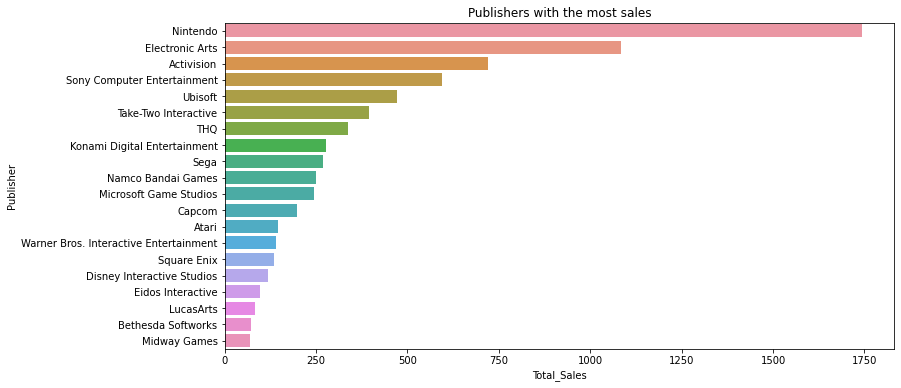

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Publishers with the most sales")
sns.barplot(x='Total_Sales',y='Publisher',data=top_sales_publisher);

## (3) 플랫폼과 publisher 사이에 상관관계가 있을 것이다.
- 새 플랫폼 빨리 적응하는 publisher는 플랫폼별로 다를 것이다.

1) 귀무가설 : 두 변수간 연관이 없다.
2) 대립가설 : 두 변수간 연관이 있다.
3) 신뢰구간 : 95%
### 카이제곱 검정 실시

In [ ]:
correlation2 = pd.crosstab(df['Publisher'],df['Platform'])

from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(correlation2)
print(f'p-value : {pval}')

# p-value = 0.0 귀무가설 기각 -> 플랫폼과 Publisher는 상관관계가 있음

p-value : 0.0


## (4) 연도별 유행하는 genre가 있을까?
 시간의 흐름(연도)에 따라 많이 사용하는 플랫폼이 다르며, 플랫폼에 따라 게임 장르가 다르다.
 따라서, 연도에 따른 게임 장르에도 차이가 있을 것이다.
### 연도, 장르를 두 변수로 카이제곱 검정 실시

In [ ]:
# 각 연도별 장르별 게임갯수 카이제곱 분석
correlation3 = pd.crosstab(df['Year'], df['Genre'])
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(correlation3 )
print(f'p-value : {pval}')

# p-value =0.0 귀무가설 기각 -> 연도와 게임장르(별 게임발매수)는 상관관계가 있음 -> 연도별 유행하는 게임장르에 차이가 있음

p-value : 0.0


In [ ]:
# 각 연도별 장르별 판매량 합계 확인
df_year_genre = pd.DataFrame(df.groupby(['Year','Genre'])['Total_Sales'].sum().unstack())

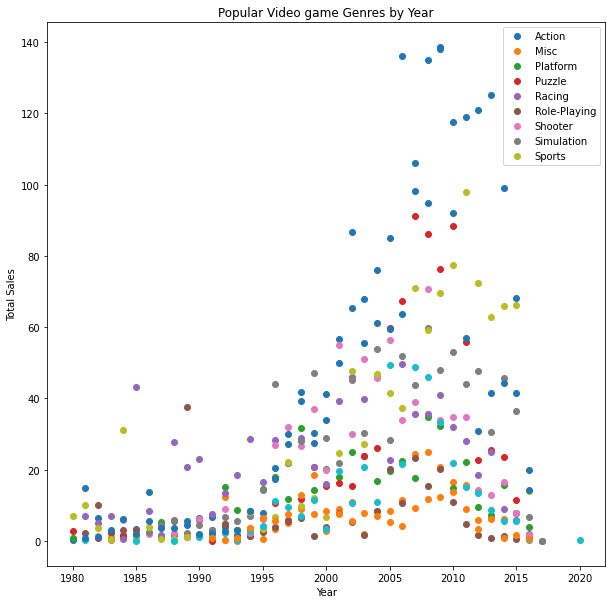

In [ ]:
# 연도별 장르별 판매량 시각화 -> 연도별 인기 장르 차이가 존재
plt.figure(figsize=(10,10))
plt.plot(df_year_genre,'o')

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Popular Video game Genres by Year')

plt.legend(['Action','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports'])

# 3. 판매량이 높은 게임에 대한 분석 및 시각화 프로세스
- 총 출고량이 많은 순으로 나열 후 누적 출고량 top25(총 게임수의 약 0.15%) 게임 분석
- top25 게임은 총 판매량(8694.35)의 7.8%(676.54)를 차지

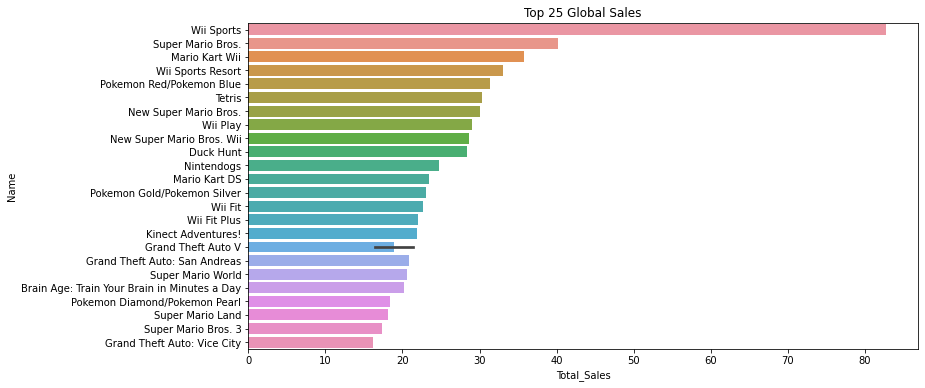

In [ ]:
#총 판매량 순으로 25개 게임 추출
top25 = df.sort_values(by=['Total_Sales'],axis=0,ascending=False).iloc[0:25].reset_index().drop('index',axis=1)

#판매량이 높은 순으로 시각화
plt.figure(figsize=(12,6))
plt.title("Top 25 Global Sales")
sns.barplot(x='Total_Sales', y='Name', data=top25)


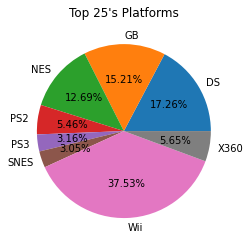

In [ ]:
# top25의 Platform별 판매량 비율을 보기위해 Platform별 그룹핑 및 파이차트 시각화
top25_platform = top25.sort_values(by=['Platform'],axis=0,ascending=False)
top25_platform = top25_platform.groupby(['Platform'])['Total_Sales'].sum()

x = ['DS','GB','NES','PS2','PS3','SNES','Wii','X360']
y = top25_platform
plt.title("Top 25's Platforms")
plt.pie(y, labels=x, autopct='%.2f%%')
plt.show()

# top25의 단일게임의 플랫폼은 WII가 약 38%로 가장 우세하고, DS>GB>NES 순으로 합해서 45%를 차지
#(참고) Platform으로 분류한 게임명 갯수 : wii 7/25, DS 5/25, GB 4/25, NES 3/25, PS2 2/25, X360 2/25, PS3 1/25, SNES 1/25

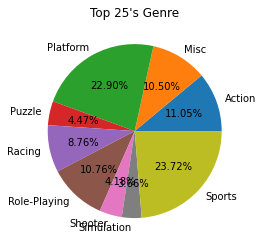

In [ ]:
# top25의 genre별 판매량 비율을 보기위해 genre별 그룹핑 및 파이차트 시각화
top25_genre = top25.sort_values(by=['Genre'],axis=0,ascending=False)
top25_genre = top25_genre.groupby(['Genre'])['Total_Sales'].sum()

x = ['Action','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports']
y = top25_genre
plt.title("Top 25's Genre")
plt.pie(y, labels=x, autopct='%.2f%%')
plt.show()

# Sports와 Platform이 top25 중 약 24%, 23%를 차지하여 우세하고, Action, MIsc, Roleplaying이 약 10%대의 점유율을 보임

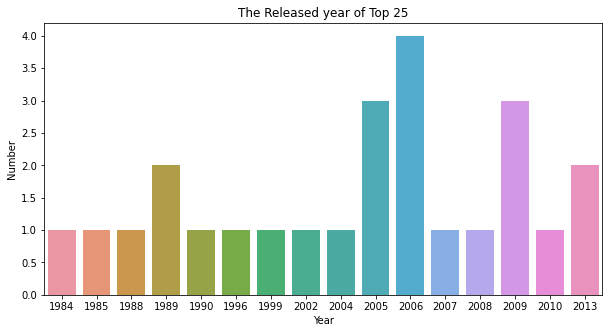

In [ ]:
# top25의 출시연도 시각화
count = pd.DataFrame(top25.groupby(['Year'])['Name'].count())
count.reset_index(inplace=True)

count = count.rename(columns = {'index':'Year','Name':'Number'})
count['Year'] = count['Year'].astype(int)
plt.figure(figsize=(10,5))
plt.title("The Released year of Top 25")
sns.barplot(data=count, x='Year', y='Number')
plt.show()

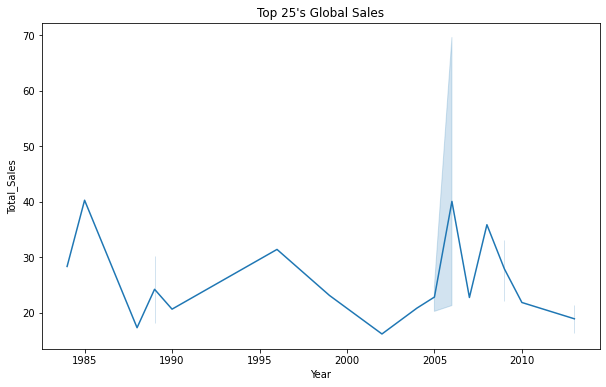

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Top 25's Global Sales")
sns.lineplot(x='Year', y='Total_Sales', data=top25)

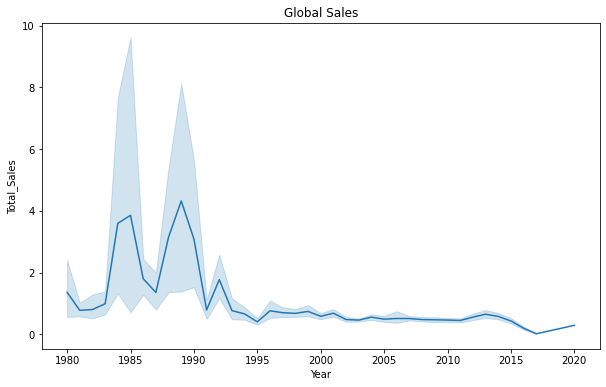

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Global Sales")
sns.lineplot(x='Year', y='Total_Sales', data=df)

In [ ]:
top25.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1).sort_values('Year')

,Name,Platform,Year,Genre,Publisher,Total_Sales
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,28.31
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
22,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,17.28
21,Super Mario Land,GB,1989.0,Platform,Nintendo,18.14
5,Tetris,GB,1989.0,Puzzle,Nintendo,30.26
18,Super Mario World,SNES,1990.0,Platform,Nintendo,20.62
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.38
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,23.09
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,16.15
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,20.81


# 결론
## 1. 대륙별 문화의 차이로 인기있는 게임의 스타일은 다르지만,
## 총 판매량 중 각각 50%, 30%를 차지하는 북미,유럽 지역의 인기장르가 비슷한 흐름을 보이며, 일본지역은 인기장르가 다르지만, 액션과 스포츠 장르의 경우 어디서나 인기가 있다.

## 2. 연도별 유행 플랫폼이 존재 > 플랫폼에 따라 장르와 퍼블리셔에 영향(특히 새로운 플랫폼이 개발되는 시점)

top25의 출시연도를 보면 
- 슈퍼마리오시리즈(특히 Super Mario Bros)의 경우 1980년도~2009년까지 제작년도가 다양함에도 상위권에 랭크되며 지속적으로 사랑받고 있기에 누적 판매량이 많을 수 밖에 없음
- 다음으로 2000년대 초반 출시게임이 많은데, 이는 wii라는 플랫폼 개발과 인기때문으로 추정됨

시대의 흐름에 따른 트렌드 변화
- 슈퍼마리오 시리즈에는 80년도부터 스테디셀러이던 Platform장르에 2000년대에 DS와 Wii플랫폼에서 racing장르가 추가되며 인기
- 포켓몬 시리즈는 90년도 후반에 유행하며 Role-playing 장르가 대세가 됨
- wii 플랫폼 출시 후, 2006년 sports 장르가 새롭게 등장한 트렌드
- 2000년대 초반과 2010년도 이후에는 X360과 PS2,3 등 새로운 플랫폼의 개발로 퍼블리셔인 'Take-Two Interactive'의 Action 장르가 인기

결국 NES, GB, DS, Wii 등 이전에 인기있는 플랫폼을 개발하며 게임도 제작하는 퍼블리셔인 Nintendo에서 누적 출고량 상위권을 놓치지 않고 있음

In [ ]:
# 2010년대 플랫폼 순위
platform_2010 = df_year_platform.iloc[:,30:40]
platform_2010

# 2010년대는 새로나온 PS4 또는 Xone 플랫폼이 주도하고 있으며, 3DS가 뒤를 잇는중 

Year,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2020.0
Platform,,,,,,,,,
2600,,,,,,,,,
3DS,,62.33,51.1,41.32,43.11,26.82,6.54,,
DC,,,,,,,,,
DS,72.52,27.52,11.55,1.96,0.02,,,,0.29
GB,,,,,,,,,
GBA,,,,,,,,,
GC,,,,,,,,,
GEN,,,,,,,,,
N64,,,,,,,,,


In [ ]:
# 2010년대 장르별 판매량 순위
df_year_genre_2010 = df_year_genre.iloc[30:]
df_year_genre_2010.replace(np.nan,"")

# Action 장르는 항상 가장 많이 판매되고, 2010년대 중반으로 가면서 Shooter 장르가 뒤를 잇는중 

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2010.0,117.5,16.57,14.88,88.4,31.98,11.11,34.93,52.91,77.36,21.9,92.02,13.68
2011.0,118.95,15.82,22.11,55.77,28.12,4.91,34.86,43.95,97.85,15.06,57.06,8.87
2012.0,120.78,5.9,9.53,22.63,18.54,1.74,14.43,47.77,72.38,13.37,30.9,3.33
2013.0,125.21,6.61,7.21,25.47,25.09,1,13.02,30.54,62.73,8.68,41.54,6.32
2014.0,99.01,6.09,15.77,23.73,8.87,1.5,16.71,45.88,65.99,5.54,44.26,0.97
2015.0,68.2,8.01,7.78,11.51,6.05,0.69,7.92,36.38,66.12,5.61,41.49,1.82
2016.0,19.83,1.79,3.85,1.09,2.08,,1.62,6.75,13.97,0.39,14.46,0.52
2017.0,0.01,,,,,,,0.04,,,,
2020.0,,,,,,,,,,0.29,,


# 새로운 게임 출시 전략 : 
## 현재 대세인 플랫폼의 게임을 만들거나, 새로운 플랫폼을 출시할 때 패러다임을 선점
### (1) 안전한 방법 : 인기있는 시리즈물에 새로운 플랫폼의 특성을 결합하여 만들기
### (2) 위험하지만 기대수익을 더 높일 수 있는 방법 : 플랫폼의 성격에 맞는 유행을 만들기(새로운 장르, 패러다임)

## 분석결과, 
### (1) 플랫폼 : 2010년대의 트렌드 플랫폼 PS의 21년 출시모델인  PS5의 패러다임 선점을 목표로 게임개발
### (2) 장르 : 지속적으로 지역과 연도에 관계없이 가장 인기가 많은 Action
### (3) 방향성 : 자사의 인기있고 평가가 좋은 시리즈물 후속편 vs 신규 시리즈물 스토리 기획

In [ ]:
## (참고) PS4시리즈이면서 Action인 게임을 추출
is_PS4 = df['Platform'] =='PS4'
is_Action = df['Genre'] =='Action'
PS4 = df[is_PS4 & is_Action]
pd.set_option('display.max_rows', df.shape[0])
PS4 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
12585,LEGO Marvel Super Heroes,PS4,2013.0,Action,Warner Bros. Interactive Entertainment,0.59,0.75,0.01,0.21,1.56
7706,Assassin's Creed IV: Black Flag,PS4,2013.0,Action,Ubisoft,1.07,1.31,0.06,0.31,2.75
12790,The LEGO Movie Videogame,PS4,2014.0,Action,Warner Bros. Interactive Entertainment,0.24,0.31,0.01,0.11,0.67
4366,Transformer: Rise of the Dark Spark,PS4,2014.0,Action,Activision,0.07,0.10,0.01,0.04,0.22
4357,Watch Dogs,PS4,2014.0,Action,Ubisoft,1.40,1.86,0.11,0.77,4.14
8230,Disney Infinity 2.0: Marvel Super Heroes,PS4,2014.0,Action,Disney Interactive Studios,0.26,0.24,0.00,0.10,0.60
10419,Tomb Raider (2013),PS4,2014.0,Action,Square Enix,0.47,0.64,0.06,0.25,1.42
11536,Yakuza: Ishin,PS4,2014.0,Action,Sega,0.00,0.00,0.15,0.00,0.15
1224,Dynasty Warriors 8: Xtreme Legends,PS4,2014.0,Action,Tecmo Koei,0.09,0.11,0.06,0.04,0.30
8397,The Evil Within,PS4,2014.0,Action,Bethesda Softworks,0.55,0.84,0.11,0.31,1.81
